### 4. Modelado (Modeling)
Aquí se seleccionan y aplican diversas técnicas de modelado (regresión, árboles de decisión, clustering, etc.). Se ajustan los parámetros de los modelos y se evalúa su calidad para elegir el mejor candidato.

In [8]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Definición de Rutas y Constantes (Independencia) ---
# Necesitamos la ruta que definimos para el archivo procesado.
PROCESSED_DIR = os.path.join('..', '02_Data', 'processed') 
PROCESSED_FILE_NAME = 'telco_churn_processed.csv'
PROCESSED_FILE_PATH = os.path.join(PROCESSED_DIR, PROCESSED_FILE_NAME)

# La columna objetivo se define aquí, ya que no se arrastra de la celda anterior.
COLUMNA_CHURN = 'churn' 

# 0. Cargar el DataFrame procesado
try:
    df = pd.read_csv(PROCESSED_FILE_PATH)
    print(f"Dataset procesado cargado exitosamente desde: {PROCESSED_FILE_PATH}. Filas: {len(df)}")
except FileNotFoundError:
    print(f"\n¡ERROR! No se encontró el archivo en la ruta: {PROCESSED_FILE_PATH}")
    print("Asegúrate de haber ejecutado completamente la FASE 3 y de que la ruta '..' sea correcta.")
    # Si la carga falla, detenemos el proceso
    raise

# 1. Definir la matriz de características (X) y el vector objetivo (y)
X = df.drop(COLUMNA_CHURN, axis=1)
y = df[COLUMNA_CHURN]

# 2. Dividir los datos en conjuntos de Entrenamiento y Prueba (70/30)
# Usamos stratify=y para mantener el desbalance de clases en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nDatos divididos. Tamaño de entrenamiento: {len(X_train)}, Tamaño de prueba: {len(X_test)}")

# 3. Entrenar Modelos

# Modelo 1: Regresión Logística (Buena interpretabilidad)
log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)
print("Regresión Logística entrenada.")

# Modelo 2: Random Forest (Buen rendimiento general)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest entrenado.")

# Ahora puedes continuar con la FASE 5: Evaluación.

Dataset procesado cargado exitosamente desde: ..\02_Data\processed\telco_churn_processed.csv. Filas: 7032

Datos divididos. Tamaño de entrenamiento: 4922, Tamaño de prueba: 2110
Regresión Logística entrenada.
Random Forest entrenado.


### 5. Evaluación (Evaluation)
Se evalúa el modelo (o modelos) de manera rigurosa para asegurarse de que cumple los objetivos de negocio definidos en la primera fase. Se determina si el modelo es lo suficientemente bueno para ser desplegado y se identifican posibles problemas.


--- Evaluación: LogisticRegression ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110

ROC AUC Score: 0.8380


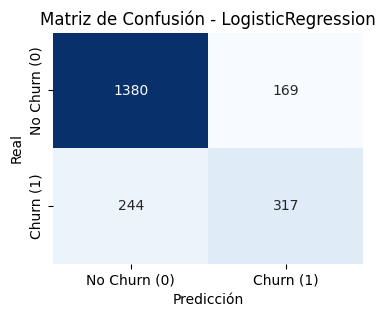


--- Evaluación: RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.64      0.45      0.53       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110

ROC AUC Score: 0.8377


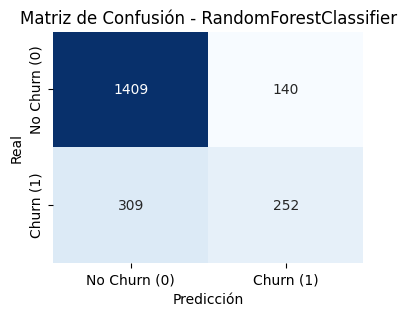

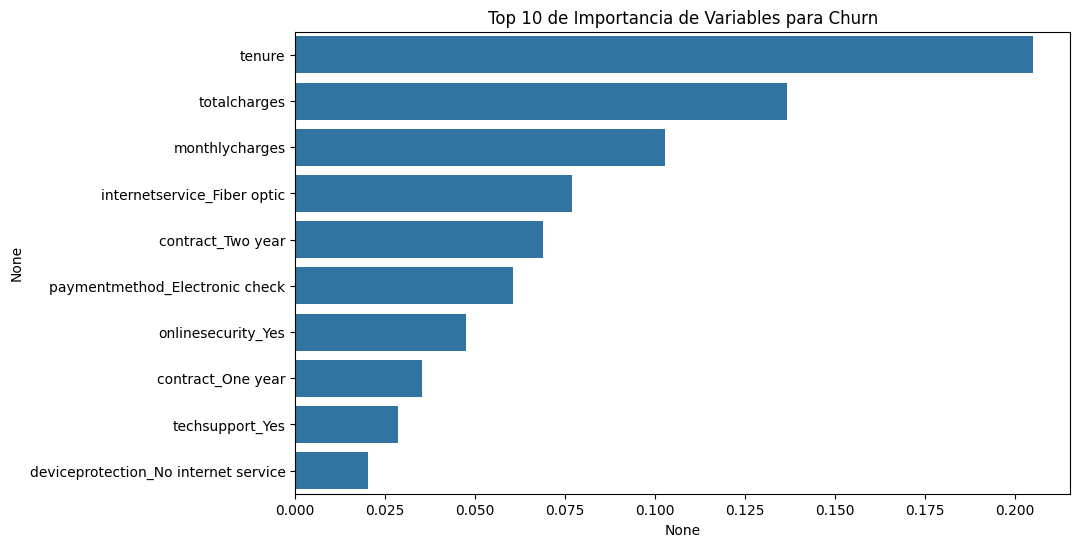


--- Top 5 Variables Impulsoras del Churn ---
tenure                         0.205081
totalcharges                   0.136565
monthlycharges                 0.102728
internetservice_Fiber optic    0.076797
contract_Two year              0.068846
dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns           
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, classification_report

# Definición de la columna objetivo (necesaria para la independencia de la celda)
COLUMNA_CHURN = 'churn' 

def evaluate_model(model, X_test, y_test):
    """Calcula y muestra métricas de clasificación, incluyendo la Matriz de Confusión."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probabilidad de ser 1 (Churn)

    print(f"\n--- Evaluación: {model.__class__.__name__} ---")
    
    # 1. Reporte de Clasificación (Precision, Recall, F1-score)
    print(classification_report(y_test, y_pred))
    
    # 2. Métrica Clave de Discriminación (AUC)
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    
    # 3. Visualizar Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['No Churn (0)', 'Churn (1)'], yticklabels=['No Churn (0)', 'Churn (1)'])
    plt.title(f'Matriz de Confusión - {model.__class__.__name__}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show() # # 1. Evaluar y comparar los modelos
# (Asumiendo que log_model, rf_model, X_test, y_test están definidos en la Fase 4)
evaluate_model(log_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)

# 2. Análisis de Conclusiones: Importancia de Variables (Random Forest)
# Verificamos que las variables del Modelado (Fase 4) estén presentes.
if 'X' in locals() and 'rf_model' in locals():
    # pd.Series requiere que pandas esté importado
    importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.head(10), y=importances.head(10).index)
    plt.title('Top 10 de Importancia de Variables para Churn')
    plt.show()

    print("\n--- Top 5 Variables Impulsoras del Churn ---")
    print(importances.head(5))
else:
    print("\nAdvertencia: Las variables X o rf_model no están definidas. Asegúrate de ejecutar la Fase 4 antes.")